# Regression

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from scipy.stats import spearmanr

from external_data_loading import get_siope_data 
from preprocess import correct_siope_indicators_by_inflation, load_and_process_data_for_analysis, get_dummies_for_categorical_variables, select_features_through_pca
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

c:\Users\cstefano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\cstefano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


____

In [4]:
# Definition of analysis focus
years_to_analyze = np.arange(2015, 2023)
time_windows = np.arange(0,16)

In [5]:
# Loading SIOPE data, and correcting for inflation
siope_df = get_siope_data("../Datasets/external-data/siope-data")
siope_df = correct_siope_indicators_by_inflation(siope_df)

## FAMD

### (i) SIOPE + ENEM features

In [15]:
for year in years_to_analyze:
    df = load_and_process_data_for_analysis_stepwise(year, siope_df, normalize = True)
    famd = prince.FAMD(n_components = 10, random_state = 1)

    print("Fitting FAMD")
    famd.fit(df.dropna().drop(columns = ["Average score", "UF"]).sample(frac = 0.7, random_state = 1))
    joblib.dump(famd, f"./variables_results/famd_{year}_10componentes_ENEM_and_SIOPE.pkl")
    

Loading data for ENEM 2015
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD
Loading data for ENEM 2016
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD
Loading data for ENEM 2017
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD
Loading data for ENEM 2018
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD
Loading data for ENEM 2019
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD
Loading data for ENEM 2020
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD
Loading data for ENEM 2021
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD
Loading data for ENEM 2022
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Fitting FAMD


#### OLR

In [27]:
for year in years_to_analyze:
    df = load_and_process_data_for_analysis_stepwise(year, siope_df, normalize = True)
    famd = joblib.load(f"./variables_results/famd_{year}_10componentes_ENEM_and_SIOPE.pkl")
    LR = OLS(
        df["Average score"].dropna(),
        exog = famd.transform(df.dropna().drop(columns = "Average score")),
        hasconst = False
    ).fit()

    joblib.dump(LR, f"./variables_results/{year}_OLR_ENEM_and_SIOPE.pkl")

Loading data for ENEM 2015
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!


ValueError: The indices for endog and exog are not aligned

In [20]:
LR = OLS(
    df["Average score"],
    exog = famd.transform(df.drop(columns = "Average score")),
    hasconst = False
    ).fit()

In [22]:
LR.llf

-17267749.074037664

In [21]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Average score   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              1160.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:39:42   Log-Likelihood:                     -1.7268e+07
No. Observations:             2245649   AIC:                                  3.454e+07
Df Residuals:                 2245639   BIC:                                  3.454e+07
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              2.7124      0.028     95.459      0.000       2.657       2.768
1             -0.1250      0.044     -2.856      0.004      -0.211      -0.039
2             -2.0957      0.048    -43.614      0.000      -2.190      -2.002
3             -0.1429      0.055     -2.618      0.009      -0.250      -0.036
4             -0.0616      0.056     -1.090      0.276      -0.172       0.049
5              1.0732      0.060     17.869      0.000       0.955       1.191
6             -0.8820      0.062    -14.226      0.000      -1.004      -0.760
7             -0.3126      0.065     -4.842      0.000      -0.439      -0.186
8              0.3763      0.065      5.771      0.000       0.248       0.504
9              0.1070      0.068      1.570      0.116      -0.027       0.241
==============================================================================
Omnibus:                    21789.691   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22728.059
Skew:                           0.231   Prob(JB):                         0.00
Kurtosis:                       3.174   Cond. No.                         2.40
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y_true = df["Average score"]
y_pred = LR.predict(famd.transform(df.drop(columns = "Average score")))

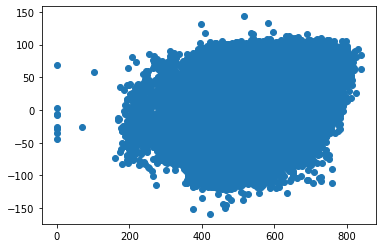

In [24]:
plt.scatter(y_true, y_pred)

In [12]:
def load_and_process_data_for_analysis_stepwise(year, siope_df, normalize = True, siope_only = False):
    print(f"Loading data for ENEM {year}")
    enem_df = joblib.load(f"ENEM_preprocessed_{year}_based_on_SG_UF_PROVA.pkl")
    enem_df.drop(columns = ["UF", "Natural Sciences score", "Humanities score", "Languages score", "Math score"], inplace = True)
    enem_df.rename(columns = {"SG_UF_PROVA": "UF"}, inplace = True)

    # get metrics average values over last 'window' years
    print(f"Processing SIOPE data")
    siope_df2 = siope_df[(siope_df["year"] <= year)][["UF", "metric_description", "metric_value", "year"]]

    # Let us mark each feature with the corresponding year
    siope_df2['siope_features'] = siope_df2.apply(lambda x: x["metric_description"] + f'_{year - x["year"]}y', axis = 1)
    siope_df2 = siope_df2[["UF", "siope_features", "metric_value"]]
    
    # Normalization
    if normalize:
        siope_df2 = ((siope_df2.pivot(index = "UF", columns = "siope_features", values = 'metric_value') - siope_df2.pivot(index = "UF", columns = "siope_features", values = 'metric_value').mean())/siope_df2.pivot(index = "UF", columns = "siope_features", values = 'metric_value').std())
        siope_df2.reset_index(names = "UF", inplace = True)
    else:
        siope_df2 = siope_df2.pivot(index = "UF", columns = "siope_features", values = 'metric_value').reset_index(names = "UF")

    # Discard metrics to which there are null values (generally, UF's that are not in SIOPE's database for these years)
    siope_metrics_to_discard = (siope_df2.isna().sum() > 0).where(lambda x: x == True).dropna().index
    siope_df2.drop(columns = siope_metrics_to_discard, inplace = True)

    print(f"Merging ENEM and SIOPE data")
    enem_df = enem_df.merge(siope_df2, on = "UF", how = "inner")
    if siope_only:
        features_to_use = [siope_feature for siope_feature in siope_df2.columns]
        features_to_use.append("Average score")
        enem_df = enem_df[features_to_use]

    print("Ready to start analysis!")
    return enem_df

In [87]:
df = load_and_process_data_for_analysis_stepwise(2022, siope_df, normalize = False)

Loading data for ENEM 2022
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!


In [90]:
def corr_spearman(x,y):
    return spearmanr(x,y)[0]

In [94]:
for year in years_to_analyze:
    df = load_and_process_data_for_analysis_stepwise(year, siope_df, normalize = False)
    R = df.corr(method = "spearman", numeric_only = True)
    joblib.dump(R, f"./variables_results/{year}_SIOPE_only_correlations_with_performance.pkl")
    print("-"*30)
    del R

Loading data for ENEM 2015
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
------------------------------
Loading data for ENEM 2016
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
------------------------------
Loading data for ENEM 2017
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
------------------------------
Loading data for ENEM 2018
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
------------------------------
Loading data for ENEM 2019
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
------------------------------
Loading data for ENEM 2020
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
------------------------------
Loading data for ENEM 2021
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
------------------------------
Loading data for ENEM 2022
Processing SIOPE data
Merging ENEM and SIO

In [97]:
R = joblib.load("./variables_results/2022_SIOPE_only_correlations_with_performance.pkl")

In [108]:
aux = abs(R["Average score"].drop("Average score").sort_values(ascending = False))[0:10]
pd.concat([aux, pd.Series(2022, index=aux.index, name="year")], axis = 1)

,Average score,year
investment_per_student_14y,0.167901,2022
investment_per_student_13y,0.167475,2022
EB_investment_per_student_14y,0.166706,2022
investment_per_student_11y,0.153133,2022
EB_investment_per_student_13y,0.150917,2022
EB_non_teaching_staff_per_student_expanses_13y,0.147292,2022
investment_per_student_10y,0.146901,2022
EB_investment_per_student_11y,0.140748,2022
EB_investment_per_student_10y,0.133461,2022
EB_non_teaching_staff_per_student_expanses_11y,0.133278,2022


In [122]:
abs(R["Average score"].drop("Average score").sort_values(ascending = False))[0:10]

investment_per_student_14y                        0.167901
investment_per_student_13y                        0.167475
EB_investment_per_student_14y                     0.166706
investment_per_student_11y                        0.153133
EB_investment_per_student_13y                     0.150917
EB_non_teaching_staff_per_student_expanses_13y    0.147292
investment_per_student_10y                        0.146901
EB_investment_per_student_11y                     0.140748
EB_investment_per_student_10y                     0.133461
EB_non_teaching_staff_per_student_expanses_11y    0.133278
Name: Average score, dtype: float64

In [113]:
top_features_corrs = pd.DataFrame()
for year in years_to_analyze:
    print(year)
    R = joblib.load(f"./variables_results/{year}_SIOPE_only_correlations_with_performance.pkl")
    aux = abs(R["Average score"].drop("Average score").sort_values(ascending = False))[0:10]
    aux = pd.concat([aux, pd.Series(year, index=aux.index, name="year")], axis = 1)
    top_features_corrs = pd.concat([top_features_corrs, aux], axis = 0)

2015
2016
2017
2018
2019
2020
2021
2022


In [117]:
top_features_corrs.reset_index(names="feature")

,feature,Average score,year
0,investment_per_student_6y,0.129747,2015
1,investment_per_student_7y,0.129463,2015
2,EB_investment_per_student_7y,0.126302,2015
3,EB_non_teaching_staff_per_student_expanses_6y,0.125532,2015
4,investment_per_student_4y,0.118902,2015
...,...,...,...
75,EB_non_teaching_staff_per_student_expanses_13y,0.147292,2022
76,investment_per_student_10y,0.146901,2022
77,EB_investment_per_student_11y,0.140748,2022
78,EB_investment_per_student_10y,0.133461,2022


<AxesSubplot: xlabel='year', ylabel='feature'>

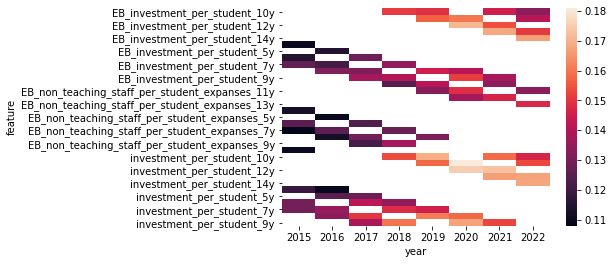

In [119]:
sns.heatmap(top_features_corrs.reset_index(names="feature").pivot(index = "feature", columns = "year", values = "Average score"))

In [ ]:
_, ax = plt.subplots(1,1, figsize = (8,6))
i = 0
for pc in ["PC1", "PC2", "PC4"]:
    top_features_weights = get_top_features_df(weights_df, years_to_analyze, pc, 15)
    sns.heatmap(top_features_weights.pivot(index = "feature", columns = "year", values = "rel_weight").fillna(-10).rename(index = renaming_dict),
            cmap = 'viridis', vmin = 0, vmax = 30, ax = ax[i], yticklabels = True)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    i += 1  
plt.tight_layout()

In [8]:
df2 = df.iloc[:, 34:].drop(columns = "ENEM_year")
df2.head()

,Average score,EB_expanses_teacher_per_student_10y,EB_expanses_teacher_per_student_11y,EB_expanses_teacher_per_student_13y,EB_expanses_teacher_per_student_14y,EB_investment_per_student_10y,EB_investment_per_student_11y,EB_investment_per_student_13y,EB_investment_per_student_14y,EB_non_teaching_staff_per_student_expanses_10y,...,investment_per_student_11y,investment_per_student_13y,investment_per_student_14y,scholar_nutrition_to_total_education_expanses_10y,scholar_nutrition_to_total_education_expanses_11y,scholar_nutrition_to_total_education_expanses_13y,scholar_nutrition_to_total_education_expanses_14y,superavit_or_deficit_10y,superavit_or_deficit_11y,superavit_or_deficit_13y
0,507.800,1425.589302,1340.413144,1190.32977,1029.311997,2695.60318,2533.641508,1660.488603,1950.159672,48.65024,...,3158.466884,2136.934389,2016.730209,0.06,0.0,0.07,0.15,1.281694e+09,-5.509535e+07,5.351662e+07
1,426.950,1425.589302,1340.413144,1190.32977,1029.311997,2695.60318,2533.641508,1660.488603,1950.159672,48.65024,...,3158.466884,2136.934389,2016.730209,0.06,0.0,0.07,0.15,1.281694e+09,-5.509535e+07,5.351662e+07
2,525.675,1425.589302,1340.413144,1190.32977,1029.311997,2695.60318,2533.641508,1660.488603,1950.159672,48.65024,...,3158.466884,2136.934389,2016.730209,0.06,0.0,0.07,0.15,1.281694e+09,-5.509535e+07,5.351662e+07
3,442.350,1425.589302,1340.413144,1190.32977,1029.311997,2695.60318,2533.641508,1660.488603,1950.159672,48.65024,...,3158.466884,2136.934389,2016.730209,0.06,0.0,0.07,0.15,1.281694e+09,-5.509535e+07,5.351662e+07
4,475.000,1425.589302,1340.413144,1190.32977,1029.311997,2695.60318,2533.641508,1660.488603,1950.159672,48.65024,...,3158.466884,2136.934389,2016.730209,0.06,0.0,0.07,0.15,1.281694e+09,-5.509535e+07,5.351662e+07


In [9]:
R = df2.corr(method = 'spearman')

In [22]:
abs(R["Average score"].drop("Average score")).sort_values(ascending = False)[0:15]

investment_per_student_14y                        0.167901
investment_per_student_13y                        0.167475
EB_investment_per_student_14y                     0.166706
FUNDEB_teacher_to_total_MDE_10y                   0.163920
FUNDEB_teacher_to_total_MDE_13y                   0.160013
investment_per_student_11y                        0.153133
EB_investment_per_student_13y                     0.150917
EB_non_teaching_staff_per_student_expanses_13y    0.147292
investment_per_student_10y                        0.146901
EB_investment_per_student_11y                     0.140748
EB_investment_per_student_10y                     0.133461
EB_non_teaching_staff_per_student_expanses_11y    0.133278
FUNDEB_teacher_to_total_MDE_11y                   0.132577
EB_non_teaching_staff_per_student_expanses_14y    0.128749
EF_FUNDEB_ratio_11y                               0.128383
Name: Average score, dtype: float64

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(df[])

## Regression approaches

### (i) SIOPE features only (stepwise)

In [129]:
famd = prince.FAMD(
     n_components=8,
     engine='sklearn',       ## Can be "auto", 'sklearn', 'fbpca'
     random_state=42)

In [133]:
pca = PCA(n_components = 5)
pca.fit(X)

PCA(n_components=5)

In [139]:
pca.explained_variance_ratio_

array([0.25838708, 0.16606282, 0.13954534, 0.0804658 , 0.05602944])

In [140]:
LR = OLS(df["Average score"], exog = pca.transform(X), hasconst = False).fit() 

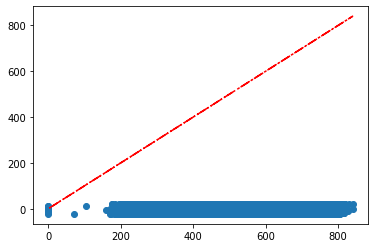

In [143]:
y_pred = LR.predict(pca.transform(X))
y_true = df["Average score"]
plt.scatter(y_true, y_pred)
plt.plot(y_true, y_true, '-.r')

In [146]:
llf = []
for n in range(1,30):
    llf.append(OLS(df["Average score"], exog = df[abs(R["Average score"].drop("Average score")).sort_values(ascending = False)[0:n].index], hasconst = False).fit().llf)
    print(f"{n} feature(s): llf = {llf[-1]}") 

1 feature(s): llf = -14203055.586694565
2 feature(s): llf = -14082155.872032255
3 feature(s): llf = -13951954.005577136
4 feature(s): llf = -13514198.840435354
5 feature(s): llf = -13353046.46836119
6 feature(s): llf = -13174070.164825602
7 feature(s): llf = -13166134.060567247
8 feature(s): llf = -13030392.407297585
9 feature(s): llf = -13009708.215339378
10 feature(s): llf = -13002163.20219679
11 feature(s): llf = -12991067.948691845
12 feature(s): llf = -12990043.578798126
13 feature(s): llf = -12989935.261556758
14 feature(s): llf = -12989393.603351297
15 feature(s): llf = -12973280.050851952
16 feature(s): llf = -12736416.839293864
17 feature(s): llf = -12736286.66938896
18 feature(s): llf = -12736104.625000339
19 feature(s): llf = -12735220.21699531
20 feature(s): llf = -12731519.861753324
21 feature(s): llf = -12728358.60500059
22 feature(s): llf = -12728273.959740428
23 feature(s): llf = -12728222.216273842
24 feature(s): llf = -12725765.315928431
25 feature(s): llf = -12722284

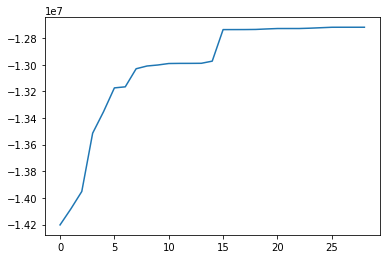

In [147]:
plt.plot(np.arange(0,len(llf)), llf)

In [144]:
LR.llf

-17272763.987036355

In [190]:
def feature_selection(data, feature_max, corr_filter):
    print("Running regressors")
    regressors = {}
    for n in range(1,feature_max+1):
        data_to_train = data[abs(corr_filter["Average score"].drop("Average score")).sort_values(ascending = False)[0:n].index]
        regressor = OLS(data["Average score"], exog = data_to_train, hasconst = False).fit()
        regressors[n] = regressor
    
    return regressors

In [191]:
for year in [2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    print(f"Running for {year}")
    df = load_and_process_data_for_analysis_stepwise(year, siope_df, normalize = False)
    R = joblib.load(f"./variables_results/{year}_SIOPE_only_correlations_with_performance.pkl")

    regressors = feature_selection(df.sample(frac=0.7, random_state = 1), 30, R)
    joblib.dump(regressors, f"./variables_results/{year}_OLS_SIOPE_only.pkl")
    print("-"*30)

Running for 2015
Loading data for ENEM 2015
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Running regressors
------------------------------
Running for 2016
Loading data for ENEM 2016
Processing SIOPE data
Merging ENEM and SIOPE data
Ready to start analysis!
Running regressors


c:\Users\cstefano\anaconda3\lib\site-packages\statsmodels\tools\tools.py:414: RuntimeWarning: overflow encountered in double_scalars
  s[i] = 1./s[i]
c:\Users\cstefano\anaconda3\lib\site-packages\statsmodels\tools\tools.py:417: RuntimeWarning: invalid value encountered in multiply
  res = np.dot(np.transpose(vt), np.multiply(s[:, np.core.newaxis],


MemoryError: Unable to allocate 881. MiB for an array with shape (29, 3981680) and data type float64

In [164]:
regressor, llf = feature_selection(data = df, feature_max = 30, corr_filter = R)

1 feature(s) llf = -26156708.62735492
2 feature(s) llf = -25582700.775541626
3 feature(s) llf = -25313888.861634266
4 feature(s) llf = -25218730.393276557
5 feature(s) llf = -24373457.829410836
6 feature(s) llf = -24270746.502405085
7 feature(s) llf = -24253452.360647365
8 feature(s) llf = -23977530.663233623
9 feature(s) llf = -23961418.208141718
10 feature(s) llf = -23925650.337526575
11 feature(s) llf = -23911587.741481554
12 feature(s) llf = -23911586.305293337
13 feature(s) llf = -23911350.59984254
14 feature(s) llf = -23893343.539753288
15 feature(s) llf = -23700594.55821714
16 feature(s) llf = -23697145.729341898
17 feature(s) llf = -23696973.852246303
18 feature(s) llf = -23696912.260806255
19 feature(s) llf = -23660338.07168054
20 feature(s) llf = -23536298.72778991
21 feature(s) llf = -23454004.803222287
22 feature(s) llf = -23387838.566449124
23 feature(s) llf = -23385268.001692414
24 feature(s) llf = -23377779.225579876
25 feature(s) llf = -23372368.60929053
26 feature(s) l

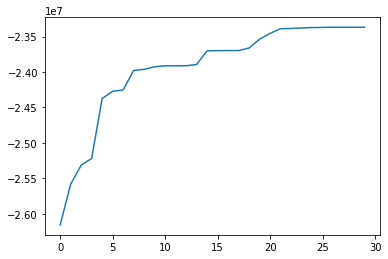

In [165]:
plt.plot(llf)

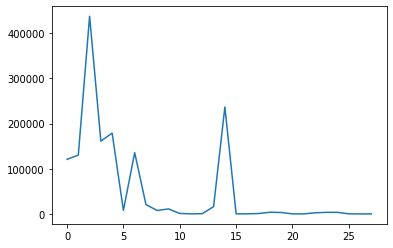

In [154]:
plt.plot(np.diff(llf))

In [151]:
np.argmin(np.diff(llf))

27

In [128]:
R["Average score"]

EB_expanses_teacher_per_student_10y                  0.010000
EB_expanses_teacher_per_student_11y                  0.041468
EB_expanses_teacher_per_student_13y                  0.041402
EB_expanses_teacher_per_student_14y                  0.103103
EB_investment_per_student_10y                        0.133461
                                                       ...   
scholar_nutrition_to_total_education_expanses_14y   -0.053021
superavit_or_deficit_10y                            -0.055030
superavit_or_deficit_11y                            -0.108846
superavit_or_deficit_13y                             0.106220
Average score                                        1.000000
Name: Average score, Length: 79, dtype: float64

In [ ]:
for year in years_to_analyze:
    df = load_and_process_data_for_analysis_stepwise(year, siope_df, normalize = False)

In [29]:
LR = OLS(df["Average score"], exog = df[abs(R["Average score"].drop("Average score")).sort_values(ascending = False)[0:40].index], hasconst = False).fit() 

In [20]:
y_true.shape

(2245649,)

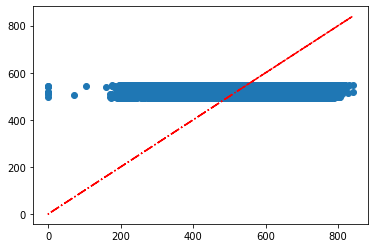

In [30]:
y_pred = LR.predict(df[abs(R["Average score"].drop("Average score")).sort_values(ascending = False)[0:40].index])
y_true = df["Average score"]
plt.scatter(y_true, y_pred)
plt.plot(y_true, y_true, '-.r')

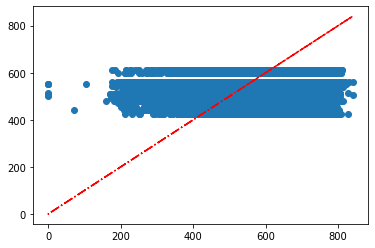

In [28]:
y_pred = LR.predict(df[abs(R["Average score"].drop("Average score")).sort_values(ascending = False)[0:15].index])
y_true = df["Average score"]
plt.scatter(y_true, y_pred)
plt.plot(y_true, y_true, '-.r')

In [26]:
LR.llf

-12973280.050851952

In [31]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Average score   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          4.722e+06
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                        0.00
Time:                        12:56:59   Log-Likelihood:                     -1.2719e+07
No. Observations:             2245649   AIC:                                  2.544e+07
Df Residuals:                 2245622   BIC:                                  2.544e+07
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
investment_per_student_14y                            0.0709      0.002     37.025      0.000       0.067       0.075
investment_per_student_13y                           -0.0397      0.004     -9.957      0.000      -0.047      -0.032
EB_investment_per_student_14y                         0.0281      0.002     16.982      0.000       0.025       0.031
FUNDEB_teacher_to_total_MDE_10y                       0.8018      0.025     32.676      0.000       0.754       0.850
FUNDEB_teacher_to_total_MDE_13y                       1.7436      0.026     68.324      0.000       1.694       1.794
investment_per_student_11y                           -0.1284      0.006    -23.217      0.000      -0.139      -0.118
EB_investment_per_student_13y                        -0.0751      0.004    -20.636      0.000      -0.082      -0.068
EB_non_teaching_staff_per_student_expanses_13y        0.0916      0.002     56.674      0.000       0.088       0.095
investment_per_student_10y                            0.1577      0.002     70.828      0.000       0.153       0.162
EB_investment_per_student_11y                         0.2936      0.006     48.638      0.000       0.282       0.305
EB_investment_per_student_10y                        -0.1048      0.002    -58.381      0.000      -0.108      -0.101
EB_non_teaching_staff_per_student_expanses_11y       -0.0387      0.001    -68.232      0.000      -0.040      -0.038
FUNDEB_teacher_to_total_MDE_11y                      -0.2050      0.008    -25.793      0.000      -0.221      -0.189
EB_non_teaching_staff_per_student_expanses_14y       -0.0747      0.001    -92.297      0.000      -0.076      -0.073
EF_FUNDEB_ratio_11y                                   1.2411      0.015     81.742      0.000       1.211       1.271
EM_FUNDEB_ratio_11y                                   1.4548      0.020     74.344      0.000       1.416       1.493
FUNDEB_balance_11y                                 1.217e-07   1.64e-09     74.273      0.000    1.18e-07    1.25e-07
scholar_nutrition_to_total_education_expanses_10y    -0.3866      0.009    -44.620      0.000      -0.404      -0.370
education_to_total_MDE_investments_14y               -0.9757      0.021    -45.628      0.000      -1.018      -0.934
EM_to_total_education_expanses_13y                    1.1561      0.010    121.505      0.000       1.137       1.175
superavit_or_deficit_11y                          -2.756e-08   6.26e-10    -43.991      0.000   -2.88e-08   -2.63e-08
FUNDEB_teacher_to_total_MDE_14y                       0.3225      0.024     13.495      0.000       0.276       0.369
superavit_or_deficit_13y          

In [52]:
pca = PCA(n_components = 2)

In [66]:
X = df2.dropna().drop(columns = "Average score")

In [78]:
X

,EB_expanses_teacher_per_student_10y,EB_expanses_teacher_per_student_11y,EB_expanses_teacher_per_student_13y,EB_expanses_teacher_per_student_14y,EB_investment_per_student_10y,EB_investment_per_student_11y,EB_investment_per_student_13y,EB_investment_per_student_14y,EB_non_teaching_staff_per_student_expanses_10y,EB_non_teaching_staff_per_student_expanses_11y,...,investment_per_student_11y,investment_per_student_13y,investment_per_student_14y,scholar_nutrition_to_total_education_expanses_10y,scholar_nutrition_to_total_education_expanses_11y,scholar_nutrition_to_total_education_expanses_13y,scholar_nutrition_to_total_education_expanses_14y,superavit_or_deficit_10y,superavit_or_deficit_11y,superavit_or_deficit_13y
0,-0.901255,-0.786599,-0.424458,-0.551737,-1.014261,-1.182568,-1.302216,-0.574407,-0.806896,-1.074084,...,-0.641540,-0.804533,-0.72402,-0.438841,-0.556234,0.205156,0.368740,0.950952,0.236334,0.435673
1,-0.901255,-0.786599,-0.424458,-0.551737,-1.014261,-1.182568,-1.302216,-0.574407,-0.806896,-1.074084,...,-0.641540,-0.804533,-0.72402,-0.438841,-0.556234,0.205156,0.368740,0.950952,0.236334,0.435673
2,-0.901255,-0.786599,-0.424458,-0.551737,-1.014261,-1.182568,-1.302216,-0.574407,-0.806896,-1.074084,...,-0.641540,-0.804533,-0.72402,-0.438841,-0.556234,0.205156,0.368740,0.950952,0.236334,0.435673
3,-0.901255,-0.786599,-0.424458,-0.551737,-1.014261,-1.182568,-1.302216,-0.574407,-0.806896,-1.074084,...,-0.641540,-0.804533,-0.72402,-0.438841,-0.556234,0.205156,0.368740,0.950952,0.236334,0.435673
4,-0.901255,-0.786599,-0.424458,-0.551737,-1.014261,-1.182568,-1.302216,-0.574407,-0.806896,-1.074084,...,-0.641540,-0.804533,-0.72402,-0.438841,-0.556234,0.205156,0.368740,0.950952,0.236334,0.435673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245644,0.942524,0.770604,1.552635,1.849444,1.561117,1.598204,3.265694,4.199940,1.014844,-0.208161,...,1.217519,2.586292,3.16065,0.264710,2.420585,5.252958,-0.339435,-0.702288,0.706715,0.496979
2245645,0.942524,0.770604,1.552635,1.849444,1.561117,1.598204,3.265694,4.199940,1.014844,-0.208161,...,1.217519,2.586292,3.16065,0.264710,2.420585,5.252958,-0.339435,-0.702288,0.706715,0.496979
2245646,0.942524,0.770604,1.552635,1.849444,1.561117,1.598204,3.265694,4.199940,1.014844,-0.208161,...,1.217519,2.586292,3.16065,0.264710,2.420585,5.252958,-0.339435,-0.702288,0.706715,0.496979
2245647,0.942524,0.770604,1.552635,1.849444,1.561117,1.598204,3.265694,4.199940,1.014844,-0.208161,...,1.217519,2.586292,3.16065,0.264710,2.420585,5.252958,-0.339435,-0.702288,0.706715,0.496979


In [76]:
(X.isna().sum() > 0)

EB_expanses_teacher_per_student_10y                  False
EB_expanses_teacher_per_student_11y                  False
EB_expanses_teacher_per_student_13y                  False
EB_expanses_teacher_per_student_14y                  False
EB_investment_per_student_10y                        False
                                                     ...  
scholar_nutrition_to_total_education_expanses_13y    False
scholar_nutrition_to_total_education_expanses_14y    False
superavit_or_deficit_10y                             False
superavit_or_deficit_11y                             False
superavit_or_deficit_13y                             False
Length: 78, dtype: bool

In [79]:
X = df2
X = ((X - X.mean())/X.std()).drop(columns = "Average score")
X.dropna(axis = 1, inplace = True)
pca.fit(X)

PCA(n_components=2)

In [80]:
pca.explained_variance_ratio_

array([0.25838708, 0.16606282])

In [81]:
LR =  OLS(df["Average score"],
          exog = pca.transform(X), hasconst = False).fit() 

In [82]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Average score   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              373.2
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                   8.79e-163
Time:                        13:14:39   Log-Likelihood:                     -1.7273e+07
No. Observations:             2245649   AIC:                                  3.455e+07
Df Residuals:                 2245647   BIC:                                  3.455e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5862      0.080     19.874      0.000       1.430       1.743
x2             1.8664      0.100     18.747      0.000       1.671       2.062
==============================================================================
Omnibus:                    65874.853   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71876.277
Skew:                           0.438   Prob(JB):                         0.00
Kurtosis:                       3.014   Cond. No.                         1.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

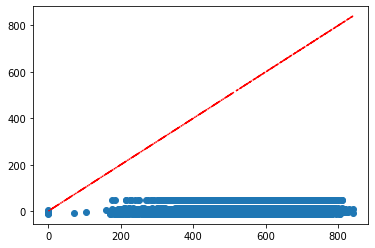

In [83]:
y_pred = LR.predict(pca.transform(X))
y_true = df["Average score"]
plt.scatter(y_true, y_pred)
plt.plot(y_true, y_true, '-.r')

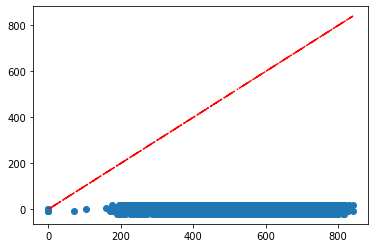

In [51]:
y_pred = LR.predict(pca.transform(X))
y_true = df["Average score"]
plt.scatter(y_true, y_pred)
plt.plot(y_true, y_true, '-.r')

In [46]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Average score   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              141.9
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                   4.50e-151
Time:                        13:03:05   Log-Likelihood:                     -1.7273e+07
No. Observations:             2245649   AIC:                                  3.455e+07
Df Residuals:                 2245644   BIC:                                  3.455e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.291e-10    1.7e-10      4.890      0.000    4.97e-10    1.16e-09
x2         -7.319e-09   3.22e-10    -22.737      0.000   -7.95e-09   -6.69e-09
x3          4.379e-09   5.62e-10      7.796      0.000    3.28e-09    5.48e-09
x4         -1.345e-09   6.86e-10     -1.962      0.050   -2.69e-09   -1.12e-12
x5          5.578e-08   5.47e-09     10.199      0.000    4.51e-08    6.65e-08
==============================================================================
Omnibus:                    68795.957   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75349.230
Skew:                           0.449   Prob(JB):                         0.00
Kurtosis:                       3.019   Cond. No.                         32.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""